In [1]:
# Skip the first 100 tasks for warmup.
SKIP = 100

def get_latencies(directory, policy):
    latencies = []
    with open('/home/stephanie/ray-fork/results/{}/{}.out'.format(directory, policy), 'r') as f:
        skip = SKIP
        for line in f.readlines():
            try:
                if skip > 0:
                    skip -= 1
                    continue
                else:
                    latency = float(line) / 2 * 1000
            except:
                skip = SKIP
                continue
            latencies.append(latency)
    return latencies

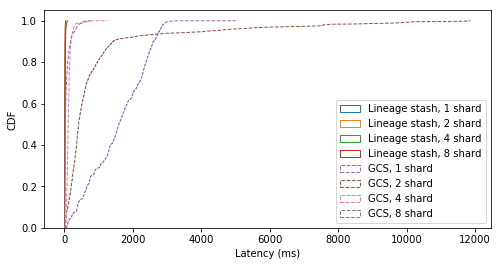

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4))

DIRECTORY = 'latencies3'
def plot(ax, directory, policy, label=None):
    if label is None:
        label = policy
    # plot the cumulative histogram
    latencies = get_latencies(directory, policy)
    linestyle = '-'
    if 'gcs' in policy:
        linestyle = '--'
    n, bins, patches = ax.hist(latencies, 1000, normed=1, histtype='step', cumulative=True, label=label, linestyle=linestyle)
    patches[0].set_xy(patches[0].get_xy()[:-1])

plot(ax, DIRECTORY, '0-policy-1-shards', "Lineage stash, 1 shard")
plot(ax, DIRECTORY, '0-policy-2-shards', "Lineage stash, 2 shard")
plot(ax, DIRECTORY, '0-policy-4-shards', "Lineage stash, 4 shard")
plot(ax, DIRECTORY, '0-policy-8-shards', "Lineage stash, 8 shard")
plot(ax, DIRECTORY, 'gcs-1-shards', "GCS, 1 shard")
plot(ax, DIRECTORY, 'gcs-2-shards', "GCS, 2 shard")
plot(ax, DIRECTORY, 'gcs-4-shards', "GCS, 4 shard")
plot(ax, DIRECTORY, 'gcs-8-shards', "GCS, 8 shard")


ax.legend(loc='lower right')
ax.set_xlabel("Latency (ms)")
ax.set_ylabel("CDF")

# plt.show()
plt.savefig("/home/stephanie/ray-fork/results/{}/latency.pdf".format(DIRECTORY))